**<center><span style="font-family:serif; font-size:34px;"> Decoding Student Retention and Churn Predictive Analytics in the Telecommunication Service Sectors - A Case Study of Vodafone (Telecel) </span>
<a id = "missingvalue" ></a><center>**

<center><span style="font-family:Palatino; font-size:22px;"><i> Did you know that attracting a new customer costs <span style="color:#DC143C;">five times</span> as much as keeping an existing one? Pfeifer (2005)</i></span> </center>

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> Data Description </span>
<a id = "missingvalue" ></a>

- **Gender**: The students's gender.
- **College**: The specific college within the university.
- **Churn**: Indicates whether the student has churned ("Yes" or "No").
- **Level**: The academic level of the student.
- **Residence**: Whether the student lives on-campus or off-campus.
- **SIM_Usage**: Whether the student uses a vodafone sim card.
- **Usage_Freq**: Frequency of SIM usage.
- **Network_Strength**: Quality of the network (on a scale).
- **Voice_Calls**: Whether the student makes voice calls.
- **Mobile_Data_Internet**: Whether the student uses mobile data.
- **SMS_Text_Messaging**: Whether the student sends SMS texts.
- **Data_Exhaustion**: Whether the student experiences data exhaustion.
- **Other_Networks**: Whether the student uses other networks.
- **Poor_Network_Quality_Coverage**: Whether the student experiences poor network quality.
- **Insufficient_Data_Allowance**: Whether the student's data allowance is insufficient.
- **Unsatisfactory_Customer_Service**: Whether the student is dissatisfied with customer service.
- **High_Costs_Pricing**: Whether the student finds the pricing high.
- **Monthly_Data_Usage**: Amount of data used monthly.


***

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;"> Loading libraries and data</span>
<a id="loading"></a>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import missingno as msno #for missing data
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px #for histogram


In [5]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# !pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
# format to 3 dp
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
data = pd.read_csv('../../../data/Synthetic/reData.csv')
# data = pd.read_csv('/content/drive/MyDrive/Research Paper Final year 4/Python Scripts/telecel/data/reData.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../../../data/Synthetic/reData.csv'

In [ ]:
data.head()

,Gender,College,Churn,Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Other_Networks,Poor_Network_Quality_Coverage,Insufficient_Data_Allowance,Unsatisfactory_Customer_Service,High_Costs_Pricing,Monthly_Data_Usage
0,Female,College of Humanities and Social Sciences,No,100,On-campus,No,Occasionally,4,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,8.680
1,Male,College of Humanities and Social Sciences,Yes,100,Off-campus,No,Several times a week,5,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,1.740
2,Male,College of Art and Built Environment,No,200,Off-campus,No,Never,1,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,9.250
3,Female,College of Humanities and Social Sciences,No,400,On-campus,Yes,Daily,4,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,3.670
4,Female,College of Humanities and Social Sciences,Yes,400,On-campus,Yes,Occasionally,5,No,No,Yes,Yes,Yes,No,No,No,Yes,0.500


>**The data set includes information about:**


* **Demographic info about students** – gender, college, and residence
* **Students account information** - how long they’ve been using the sim card(level) and their usage
* **Students who no longer use their sim** – the column is called Churn
* **Services that each student uses** – voice call, mobile data and sms texting
* **Factors influence discountinuation** – multiple networks, network coverage, customer service, data allowance, high cost of services
* **Data Activity**  - data usage, exhaust monthly data

***

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> Undertanding the data</span>
<a id = "Undertanding the data" ></a>

In [ ]:
data.shape

(768, 18)

In [ ]:
data.columns.values

array(['Gender', 'College', 'Churn', 'Level', 'Residence', 'SIM_Usage',
       'Usage_Freq', 'Network_Strength', 'Voice_Calls',
       'Mobile_Data_Internet', 'SMS_Text_Messaging', 'Data_Exhaustion',
       'Other_Networks', 'Poor_Network_Quality_Coverage',
       'Insufficient_Data_Allowance', 'Unsatisfactory_Customer_Service',
       'High_Costs_Pricing', 'Monthly_Data_Usage'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           768 non-null    object 
 1   College                          768 non-null    object 
 2   Churn                            768 non-null    object 
 3   Level                            768 non-null    int64  
 4   Residence                        768 non-null    object 
 5   SIM_Usage                        768 non-null    object 
 6   Usage_Freq                       768 non-null    object 
 7   Network_Strength                 768 non-null    int64  
 8   Voice_Calls                      768 non-null    object 
 9   Mobile_Data_Internet             768 non-null    object 
 10  SMS_Text_Messaging               768 non-null    object 
 11  Data_Exhaustion                  768 non-null    object 
 12  Other_Networks        

In [ ]:
data.describe()
# data.describe(include=["object", "bool"]) # For non-numeric


,Level,Network_Strength,Monthly_Data_Usage
count,768.000,768.000,768.000
mean,263.021,2.995,5.076
std,130.038,1.389,2.825
min,100.000,1.000,0.500
25%,200.000,2.000,2.610
50%,300.000,3.000,5.025
75%,400.000,4.000,7.537
max,600.000,5.000,10.450


***

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> Checking missing values </span>
<a id = "missingvalue" ></a>

In [ ]:
data.isnull().sum()

Gender                             0
College                            0
Churn                              0
Level                              0
Residence                          0
SIM_Usage                          0
Usage_Freq                         0
Network_Strength                   0
Voice_Calls                        0
Mobile_Data_Internet               0
SMS_Text_Messaging                 0
Data_Exhaustion                    0
Other_Networks                     0
Poor_Network_Quality_Coverage      0
Insufficient_Data_Allowance        0
Unsatisfactory_Customer_Service    0
High_Costs_Pricing                 0
Monthly_Data_Usage                 0
dtype: int64

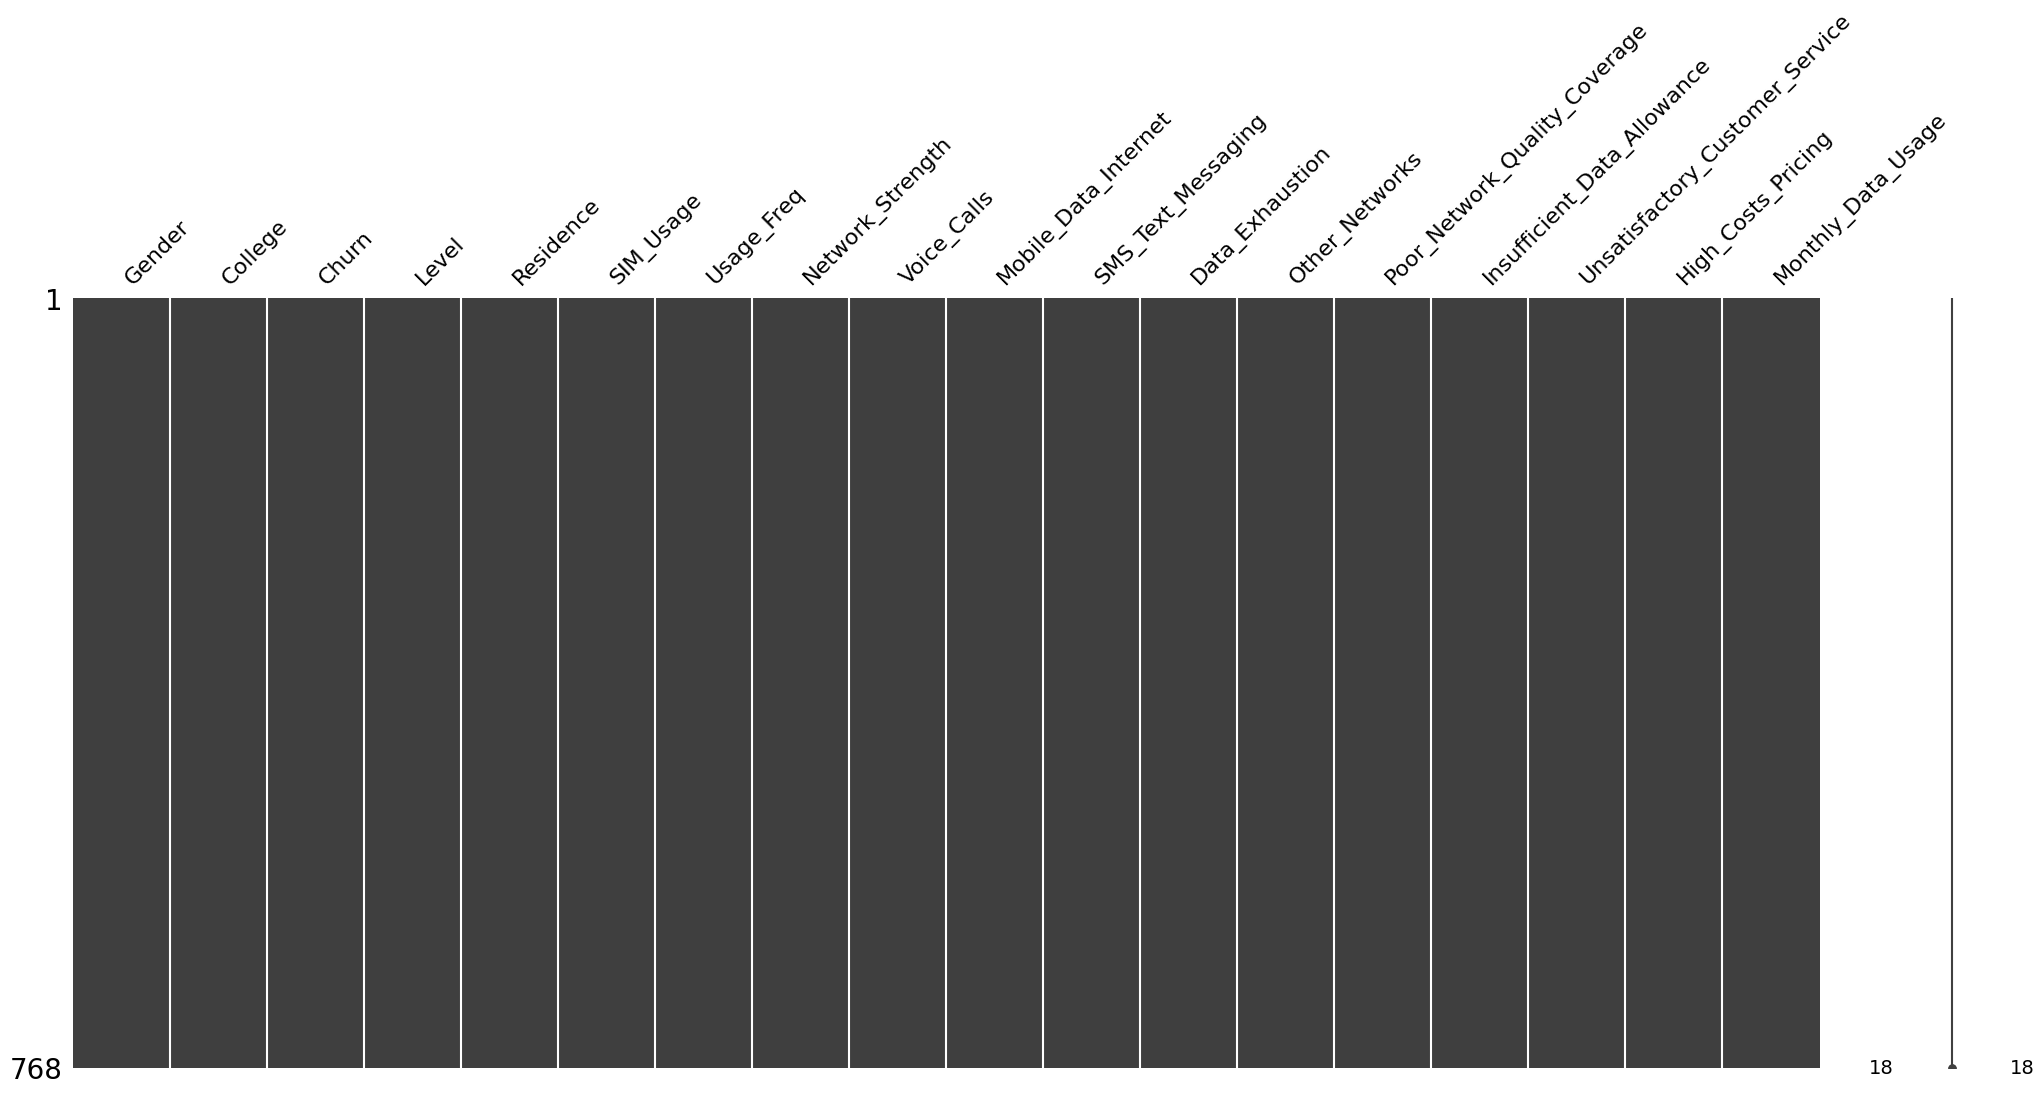

In [ ]:
# Visualize missing values as a matrix
msno.matrix(data);

> Using this matrix we can very quickly find the pattern of missingness in the dataset.
* From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.

***

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> Data Manipulation </span>
<a id = "8" ></a>

In [ ]:
# Assuming 'data' is your DataFrame
college_mapping = {
    'College of Agriculture and Natural Resources': 'CANARSA',
    'College of Science': 'COS',
    'College of Engineering': 'COE',
    'College of Art and Built Environment': 'CABE',
    'College of Humanities and Social Science': 'COHSS',
    'College of Health Sciences': 'COH'

}

data['College'] = data['College'].replace(college_mapping, regex=True)

>Shorten the colleges names to abbreviations

***

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> Data Visualization </span>
<a id = "8" ></a>

In [ ]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions of Students",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

* Only 32% of students switched to another firm.
* Students are 47.4 % female and 52.5 % male.

In [ ]:
# # Count the number of 'No Churn' and 'Churn' cases for each gender
# no_churn = data["Churn"][data["Churn"] == "No"].groupby(by=data["Gender"]).count().reset_index()
# yes_churn = data["Churn"][data["Churn"] == "Yes"].groupby(by=data["Gender"]).count().reset_index()

# # Rename columns
# no_churn.columns = ["Gender", "No Churn"]
# yes_churn.columns = ["Gender", "Churn"]

# # Merge the two DataFrames
# churn_table = pd.merge(no_churn, yes_churn, on="Gender", how="outer")

# # Calculate the total
# churn_table["Total"] = churn_table["No Churn"] + churn_table["Churn"]
# churn_table


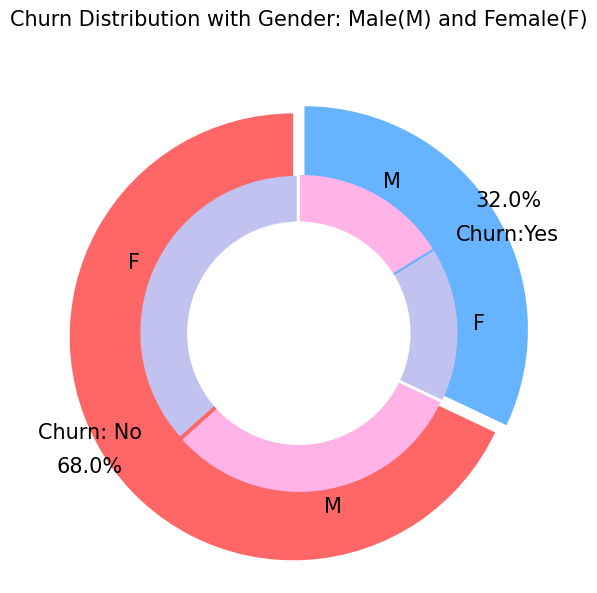

Gender,Female,Male,All
Churn,,,
No,281,241,522
Yes,122,124,246
All,403,365,768


In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: No","Churn:Yes"]
values = [522,246]
labels_gender = ["F","M","F","M"]
sizes_gender = [281,241 , 122,124]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution with Gender: Male(M) and Female(F)', fontsize=15, y=1.1)

# show plot 

plt.axis('equal')
plt.tight_layout()
plt.show()

pd.crosstab(data["Churn"], data["Gender"], margins=True)


>There is negligible difference in customer percentage who chanaged or terminated their vodafone service. Both genders behaved in similar fashion when it comes to migrating to another service provider or stop using the vodafone.

In [ ]:
fig = px.histogram(data, x="Churn", color="College", barmode="group", title="<b>College Churn distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Distribution By Colleges**

- College of Agriculture and Natural Resources: CANARSA
- College of Science: COS  
- College of Engineering: COE  
- College of Art and Built Environment: CABE  
- College of Humanities and Social Science: COHSS  
- College of Health Sciences: COH
> COS and CABE tend to have very high churn rates

In [ ]:
# # Boxplot

# # Calculate the count of levels for each College
# level_counts = data.groupby(['College', 'Level']).size().reset_index(name='Count')

# # Create the grouped box plot
# fig = px.box(data, x="College", y="Level", color="College", title="<b>College Churn Distribution</b>")

# # Add annotations for level counts
# for college, level, count in zip(level_counts['College'], level_counts['Level'], level_counts['Count']):
#     fig.add_annotation(
#         x=college,
#         y=level,
#         text=str(count),
#         showarrow=False,
#         font=dict(size=12, color='black')
#     )
# # Customize layout
# fig.update_layout(width=700, height=500)
# # Show the plot
# fig.show()

# # Histogram
# # fig = px.histogram(data, x="College", color="Level", barmode="group", title="<b>College Churn distribution<b>")
# # fig.update_layout(width=700, height=500, bargap=0.1)
# # fig.show()

# # Violin
# # fig = px.violin(data, x="College", y="Level", box=True, points="all", title="<b>College Churn distribution<b>")
# # fig.update_layout(width=700, height=500)
# # fig.show()


In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="Residence",  title="<b>Churn distribution by Residence</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
import plotly.graph_objects as go

labels = data['Usage_Freq'].unique()
values = data['Usage_Freq'].value_counts()

# Define explode values; set non-zero values for the slices you want to explode
explode = [0.1 if label in ['Rarely', 'Daily'] else 0 for label in labels]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent+value',
                             hole=.5, pull=explode,
                             textposition='outside')])

fig.update_layout(title_text="<b>Usage Frequency Distribution</b>")

fig.show()


In [ ]:
fig = px.histogram(data, x="Churn", color="Usage_Freq", title="<b>Usage Frequency Distribution with Churn included </b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:

labels = data['Other_Networks'].unique()
values = data['Other_Networks'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='label+percent+value')])

fig.update_layout(title_text="<b>Multiple Network Distribution</b>")

fig.show()


In [ ]:
fig = go.Figure(data=[go.Bar(x=data['Network_Strength'].value_counts().index,
                             y=data['Network_Strength'].value_counts().values,
                             marker=dict(color=px.colors.sequential.Plasma))])

fig.update_layout(title_text="<b> Network_Strength Distribution</b>",
                  xaxis_title="Network Strength",
                  yaxis_title="Count")

fig.show()



Churn Distribution w.r.t. Voice Calls, Mobile Data Internet, and SMS Text Messaging

In [ ]:

# Create a list of unique values in the 'Churn' column
churn_values = ['Yes', 'No']
voice = data['Voice_Calls'].value_counts()
mobile_data = data['Mobile_Data_Internet'].value_counts()
SMS_messaging = data['SMS_Text_Messaging'].value_counts()
fig = go.Figure()

# Voice Calls
fig.add_trace(go.Bar(
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    x=churn_values,
    y=voice,
    name='Voice Calls'
))

# Mobile Data Internet
fig.add_trace(go.Bar(
    x=churn_values,
    y=mobile_data,
    name='Mobile Data Internet'
))

# SMS Text Messaging
fig.add_trace(go.Bar(
    x=churn_values,
    y=SMS_messaging,
    name='SMS Text Messaging'
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Voice Calls, Mobile Data Internet, and SMS Text Messaging</b>")

fig.show()
# data['SMS_Text_Messaging'].value_counts()
# fig = go.Figure()

# fig.add_trace(go.Bar(
#   x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
#        ["Female", "Male", "Female", "Male"]],
#   y = [965, 992, 219, 240],
#   name = 'DSL',
# ))

# fig.add_trace(go.Bar(
#   x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
#        ["Female", "Male", "Female", "Male"]],
#   y = [889, 910, 664, 633],
#   name = 'Fiber optic',
# ))

# fig.add_trace(go.Bar(
#   x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
#        ["Female", "Male", "Female", "Male"]],
#   y = [690, 717, 56, 57],
#   name = 'No Internet',
# ))

# fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

# fig.show()

In [ ]:
# combined_df = pd.concat([data['Gender'],data['Voice_Calls'], data['Mobile_Data_Internet'], data['SMS_Text_Messaging']], axis=1)
# a=combined_df[combined_df["Gender"]=="Male"][["Voice_Calls"]].value_counts()
# b=combined_df[combined_df["Gender"]=="Male"][["Mobile_Data_Internet"]].value_counts()
# c=combined_df[combined_df["Gender"]=="Male"][["SMS_Text_Messaging"]].value_counts()
# combined_value_counts = pd.DataFrame({'Voice_Calls': a, 'Mobile_Data_Internet': b, 'SMS_Text_Messaging': c})
# combined_value_counts['Total'] = combined_value_counts.sum(axis=1)
# combined_value_counts


In [ ]:
# combined_df = pd.concat([data['Gender'],data['Voice_Calls'], data['Mobile_Data_Internet'], data['SMS_Text_Messaging']], axis=1)
# a=combined_df[combined_df["Gender"]=="Female"][["Voice_Calls"]].value_counts()
# b=combined_df[combined_df["Gender"]=="Female"][["Mobile_Data_Internet"]].value_counts()
# c=combined_df[combined_df["Gender"]=="Female"][["SMS_Text_Messaging"]].value_counts()
# combined_value_counts = pd.DataFrame({'Voice_Calls': a, 'Mobile_Data_Internet': b, 'SMS_Text_Messaging': c})
# combined_value_counts['Total'] = combined_value_counts.sum(axis=1)
# combined_value_counts


In [ ]:
fig = go.Figure()

# Poor_Network_Quality_Coverage
fig.add_trace(go.Bar(
  x = ['Churn:No', 'Churn:Yes'],
  y = data[data['Voice_Calls'] == 'Yes']['Churn'].value_counts().tolist(),
  name = 'Poor_Network_Quality_Coverage',
))

# Insufficient_Data_Allowance
fig.add_trace(go.Bar(
  x = ['Churn:No', 'Churn:Yes'],
  y = data[data['Mobile_Data_Internet'] == 'Yes']['Churn'].value_counts().tolist(),
  name = 'Mobile Data Internet',
))

# Unsatisfactory_Customer_Service
fig.add_trace(go.Bar(
  x = ['Churn:No', 'Churn:Yes'],
  y = data[data['SMS_Text_Messaging'] == 'Yes']['Churn'].value_counts().tolist(),
  name = 'Unsatisfactory_Customer_Service',
))
# High_Costs_Pricing
fig.add_trace(go.Bar(
  x = ['Churn:No', 'Churn:Yes'],
  y = data[data['SMS_Text_Messaging'] == 'Yes']['Churn'].value_counts().tolist(),
  name = 'High_Costs_Pricing',
))


fig.update_layout(title_text="<b>Churn Distribution w.r.t. Poor_Network_Quality_Coverage, Insufficient_Data_Allowance,Unsatisfactory_Customer_Service and High_Costs_Pricing</b>")

fig.show()


In [ ]:
import plotly.express as px

fig = px.violin(data, x='Churn', y='Level', box=True)

# Update yaxis properties
fig.update_yaxes(title_text='Level (Year)', row=1, col=1)

# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
                  title_font=dict(size=25, family='Courier'),
                  title='<b>Level vs Churn</b>')

fig.show()

* The shapes of the two violins are quite similar, suggesting that the overall distribution of "Level" is comparable for both categories of "Churn".
* The median "Level" (the thick horizontal line inside the box) appears to be slightly higher for the "Yes" category compared to the "NO" category.
* The interquartile ranges (the boxes) and the whiskers (extending to the minimum and maximum values) also seem to be relatively similar for both categories, indicating that the spread and range of "Level" values are Yest vastly different.

**Distribution of Monthly_Data_Usage by Data_Exhaustion**

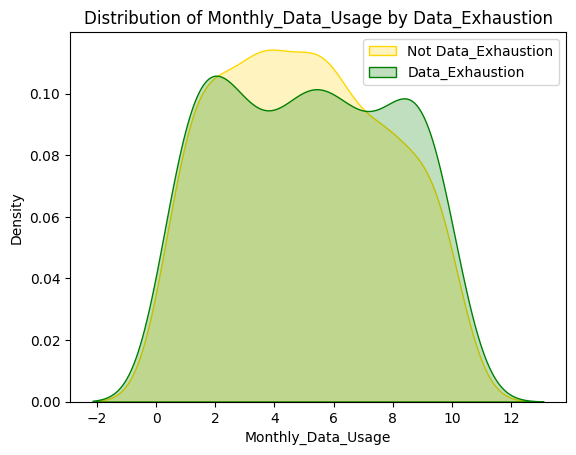

In [ ]:
ax = sns.kdeplot(data.Monthly_Data_Usage[(data["Data_Exhaustion"] == 'No') ],
                color="Gold", fill = True);
ax = sns.kdeplot(data.Monthly_Data_Usage[(data["Data_Exhaustion"] == 'Yes') ],
                ax =ax, color="Green", fill= True);
ax.legend(["Not Data_Exhaustion","Data_Exhaustion"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly_Data_Usage');
ax.set_title('Distribution of Monthly_Data_Usage by Data_Exhaustion');


* Data_Exhaustion (Green): Peaks at a value of 2 on the Monthly_Data_Usage axis, indicating that users experiencing data exhaustion tend to use around this amount of data before their data runs out.
* Not Data_Exhaustion (Yellow): Has a peak slightly to the right of the Data_Exhaustion peak, suggesting that users who do not churn generally consume more data.

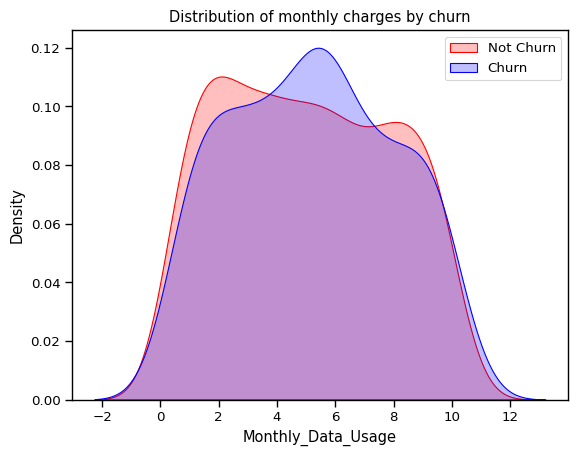

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.Monthly_Data_Usage[(data["Churn"] == 'No') ],
                color="Red", fill = True);
ax = sns.kdeplot(data.Monthly_Data_Usage[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly_Data_Usage');
ax.set_title('Distribution of monthly charges by churn');


* The distributions for both groups are unimodal, meaning they have a single peak or mode.
* The distribution for the "Not Churn" group (purple curve) is slightly shifted to the right compared to the "Churn" group (blue curve). This suggests that customers who did not churn tend to have higher monthly data usage on average.
* The peak of the "Not Churn" distribution is lower and wider than the peak of the "Churn" distribution. This indicates that the monthly data usage for customers who did not churn is more spread out or has a higher variance compared to the customers who churned.
* The overlap between the two distributions is significant, which means that there is a considerable amount of similarity in the monthly data usage patterns between the two groups.

Imagine you have a big jar of jellybeans. Some jellybeans are yellow, and some are green. If we take out the jellybeans one by one and sort them into two piles based on their colors, we can see how many of each color we have. The yellow jellybeans are like the people who keep using their phone data without running out, and the green jellybeans are like the people who use up all their data and can't use the internet anymore.

The graph you showed me is like those piles of jellybeans. It has two hills: one for the yellow jellybeans and one for the green jellybeans. The taller the hill, the more jellybeans there are in that pile. So, by looking at the hills, we can tell which color of jellybeans - or which group of people - has more or less phone data used. It's like a game to see who uses their phone data the most! 📊📱

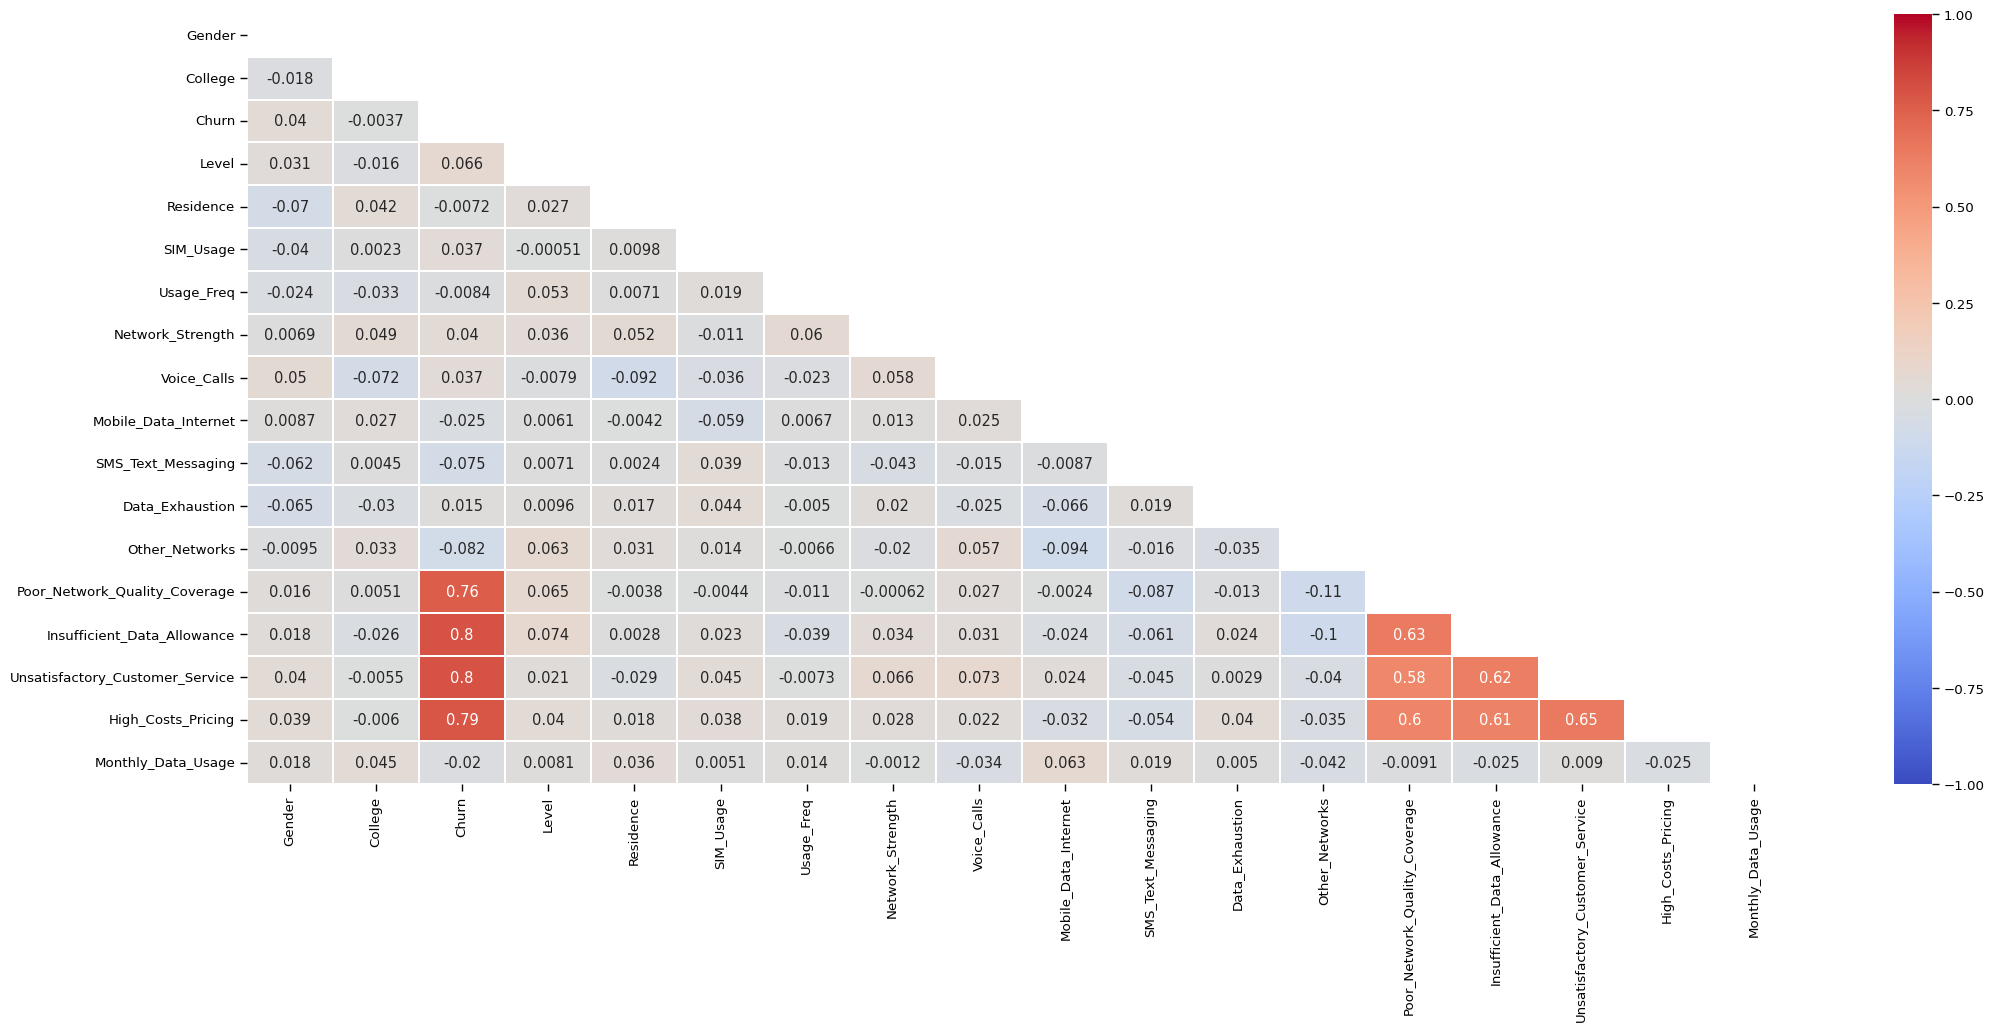

In [ ]:
plt.figure(figsize=(25, 10))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
# sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')


***

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;">Model Preprocessing</span>
<a id = Model Preprocessing ></a>

In [ ]:
# Create a DataFrame to store the encoded values
encoded_values = pd.DataFrame(columns=['Feature', 'Category', 'Encoded Value'])
# Get all the categorical columns
category_feature = data.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each categorical feature
for feature in category_feature:
    # Fit the LabelEncoder on the current feature and transform the data
    data[feature] = le.fit_transform(data[feature])

    # Get the encoded values for the current feature
    for category, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        # Create a temporary DataFrame to hold the current row
        temp_df = pd.DataFrame([{'Feature': feature, 'Category': category, 'Encoded Value': encoded_value}])

        # Append the temporary DataFrame to the main DataFrame
        encoded_values = pd.concat([encoded_values, temp_df], ignore_index=True)


In [ ]:
# Display the encoded values
encoded_values

,Feature,Category,Encoded Value
0,Gender,Female,0
1,Gender,Male,1
2,College,CABE,0
3,College,CANARSA,1
4,College,COE,2
5,College,COH,3
6,College,COHSSs,4
7,College,COS,5
8,Churn,No,0
9,Churn,Yes,1


In [ ]:
# Now your data is ready for machine learning algorithms
data.head()

,Gender,College,Churn,Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Other_Networks,Poor_Network_Quality_Coverage,Insufficient_Data_Allowance,Unsatisfactory_Customer_Service,High_Costs_Pricing,Monthly_Data_Usage
0,0,4,0,100,1,0,2,4,1,1,1,1,1,1,1,1,1,8.680
1,1,4,1,100,0,0,4,5,1,1,1,1,1,1,0,0,0,1.740
2,1,0,0,200,0,0,1,1,1,1,1,0,1,1,1,1,1,9.250
3,0,4,0,400,1,1,0,4,1,1,1,0,1,1,1,1,1,3.670
4,0,4,1,400,1,1,2,5,0,0,1,1,1,0,0,0,1,0.500


In [ ]:
# Splitting the data into training and test sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing completed!")

Data preprocessing completed!


In [ ]:
plt.figure(figsize=(14,7))
data.corr()['Churn'].sort_values(ascending = False)

Churn                              1.000
Other_Networks                     0.082
SMS_Text_Messaging                 0.075
College                            0.043
Level                              0.041
Gender                             0.040
SIM_Usage                          0.037
Monthly_Data_Usage                 0.031
Mobile_Data_Internet               0.025
Usage_Freq                         0.017
Residence                          0.007
Data_Exhaustion                   -0.015
Voice_Calls                       -0.037
Network_Strength                  -0.046
Poor_Network_Quality_Coverage     -0.762
High_Costs_Pricing                -0.788
Unsatisfactory_Customer_Service   -0.800
Insufficient_Data_Allowance       -0.803
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [ ]:
# def distplot(feature, frame, color='r'):
#     # plt.figure(figsize=(8,3))
#     plt.title("Distribution for {}".format(feature))
#     ax = sns.distplot(frame[feature], color= color)

In [ ]:
# num_cols = [ 'Network_Strength', 'Monthly_Data_Usage']
# for feat in num_cols: distplot(feat, data)

***

<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> Machine Learning Model Evaluations and Predictions</span>
<a id = "modelprediction" ></a>

In [ ]:
# Initialize the models
lr = LogisticRegression(random_state=42, solver='liblinear')
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
nn = MLPClassifier(random_state=42, max_iter=1000)
lgbm = LGBMClassifier(random_state=42)
# lightgbm.basic.Booster.silent = True

# List of models
models = [lr,rf,knn, svm, gb, nn, lgbm]
# Define the hyperparameters for each model``
hyperparameters = {
    'LogisticRegression': {
        'C': uniform(0.1, 10),
        'penalty': ['l1', 'l2']
    },
    'RandomForestClassifier': {
        'n_estimators': randint(50, 200),
       'max_depth': randint(1, 10)
    },
    'KNeighborsClassifier': {
        'n_neighbors': randint(1, 10)
    },
    'SVC': {
        'C': uniform(0.1, 10),
        'gamma': uniform(0.001, 1)
    },
    'GradientBoostingClassifier': {
        'n_estimators': randint(50, 200),
       'max_depth': randint(1, 10),
        'learning_rate': uniform(0.01, 0.3)
    },
    'MLPClassifier': {
        'hidden_layer_sizes': (randint(10, 100).rvs(), randint(10, 100).rvs()),
        'alpha': uniform(0.0001, 0.1)
    },
    'LGBMClassifier': {
        'n_estimators': randint(50, 200),
       'max_depth': randint(1, 10),
        'learning_rate': uniform(0.01, 0.3)
    }
}

# # Perform a randomized search for each model
# for model in models:
#     model_name = model.__class__.__name__
#     print(f"\nTuning {model_name}...")

#     # Initialize a RandomizedSearchCV object
#     rs = RandomizedSearchCV(rf, hyperparameters['RandomForestClassifier'], n_iter=10, cv=5, random_state=42, n_jobs=-1, error_score='raise')
#     # Fit the RandomizedSearchCV object to the data
#     rs.fit(X_train, y_train)

#     # Print the best parameters and the best score
#     print(f"Best parameters: {rs.best_params_}")
#     # print(f"Best score: {rs.best_score_}")

In [ ]:
import lightgbm

# Perform a randomized search for each model
for model in models:
    model_name = model.__class__.__name__
    print(f"\nTuning {model_name}...")

    # Initialize a RandomizedSearchCV object
    rs = RandomizedSearchCV(model, hyperparameters[model_name], n_iter=10, cv=5, random_state=42, n_jobs=-1)

    # Fit the RandomizedSearchCV object to the data
    rs.fit(X_train, y_train)

    # Print the best parameters and the best score
    print(f"Best parameters: {rs.best_params_}")
    print(f"Best score: {rs.best_score_}")

    # Make predictions on the test set
    y_pred = rs.best_estimator_.predict(X_test)

    # Print the confusion matrix
    print(f"Confusion matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Tuning LogisticRegression...


Best parameters: {'C': 3.845401188473625, 'penalty': 'l1'}
Best score: 0.9885912301745968
Confusion matrix for LogisticRegression:
[[111   0]
 [  3  40]]



Tuning RandomForestClassifier...
Best parameters: {'max_depth': 7, 'n_estimators': 142}
Best score: 0.9983739837398374
Confusion matrix for RandomForestClassifier:
[[111   0]
 [  0  43]]



Tuning KNeighborsClassifier...
Best parameters: {'n_neighbors': 3}
Best score: 0.7670798347327735
Confusion matrix for KNeighborsClassifier:
[[104   7]
 [ 24  19]]



Tuning SVC...
Best parameters: {'C': 1.6601864044243653, 'gamma': 0.15699452033620265}
Best score: 0.8745435159269626
Confusion matrix for SVC:
[[109   2]
 [ 11  32]]



Tuning GradientBoostingClassifier...
Best parameters: {'learning_rate': 0.05680559213273095, 'max_depth': 3, 'n_estimators': 124}
Best score: 0.9983739837398374
Confusion matrix for GradientBoostingClassifier:
[[111   0]
 [  0  43]]



Tuning MLPClassifier...
Best parameters: {'alpha': 0.05996584841970366, 'hidden_

In [ ]:
# confusion matrix for each model
for model in models:
    model_name = model.__class__.__name__
    print(f"\nTuning {model_name}...")

    # Initialize a RandomizedSearchCV object
    rs = RandomizedSearchCV(model, hyperparameters[model_name], n_iter=10, cv=5, random_state=42, n_jobs=-1)

    # Fit the RandomizedSearchCV object to the data
    rs.fit(X_train, y_train)

    # Print the best parameters and the best score
    print(f"Best parameters: {rs.best_params_}")
    print(f"Best score: {rs.best_score_}")

    # Make predictions on the test set
    y_pred = rs.best_estimator_.predict(X_test)

    # Print the confusion matrix
    print(f"Confusion matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

    # Print the classification report
    print(f"Classification report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("\n")


Tuning LogisticRegression...
Best parameters: {'C': 3.845401188473625, 'penalty': 'l1'}
Best score: 0.9885912301745968
Confusion matrix for LogisticRegression:
[[111   0]
 [  3  40]]


Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       111
           1       1.00      0.93      0.96        43

    accuracy                           0.98       154
   macro avg       0.99      0.97      0.98       154
weighted avg       0.98      0.98      0.98       154




Tuning RandomForestClassifier...
Best parameters: {'max_depth': 7, 'n_estimators': 142}
Best score: 0.9983739837398374
Confusion matrix for RandomForestClassifier:
[[111   0]
 [  0  43]]


Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        43

    accuracy                       


Tuning LogisticRegression...
Best parameters: {'C': 3.845401188473625, 'penalty': 'l1'}
Best score: 0.9885912301745968
Confusion matrix for LogisticRegression:
[[111   0]
 [  3  40]]


Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       111
           1       1.00      0.93      0.96        43

    accuracy                           0.98       154
   macro avg       0.99      0.97      0.98       154
weighted avg       0.98      0.98      0.98       154





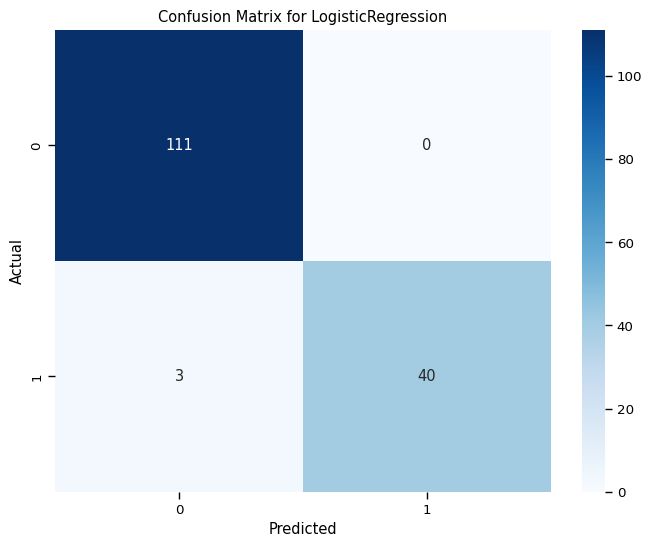


Tuning RandomForestClassifier...
Best parameters: {'max_depth': 7, 'n_estimators': 142}
Best score: 0.9983739837398374
Confusion matrix for RandomForestClassifier:
[[111   0]
 [  0  43]]


Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        43

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154





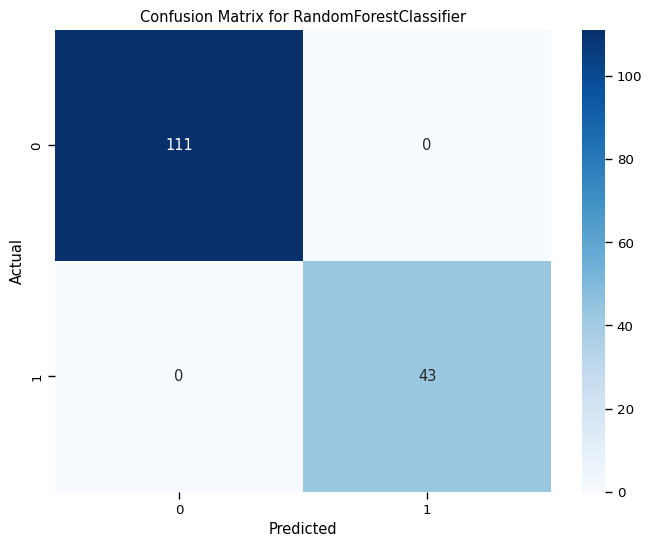


Tuning KNeighborsClassifier...
Best parameters: {'n_neighbors': 3}
Best score: 0.7670798347327735
Confusion matrix for KNeighborsClassifier:
[[104   7]
 [ 24  19]]


Classification report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       111
           1       0.73      0.44      0.55        43

    accuracy                           0.80       154
   macro avg       0.77      0.69      0.71       154
weighted avg       0.79      0.80      0.78       154





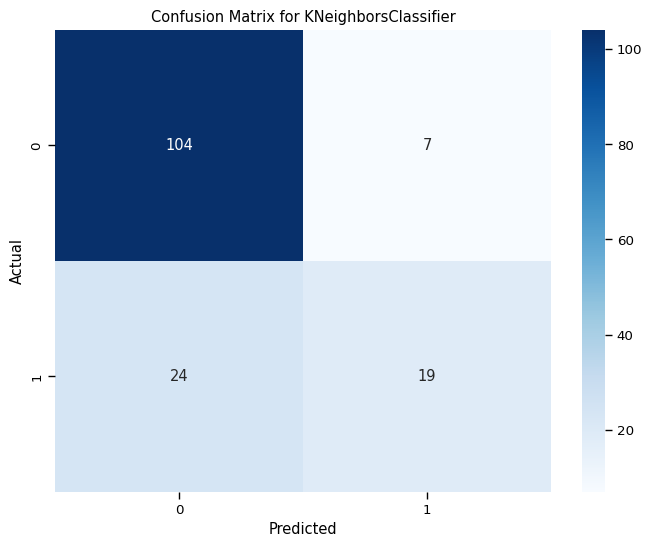


Tuning SVC...
Best parameters: {'C': 1.6601864044243653, 'gamma': 0.15699452033620265}
Best score: 0.8745435159269626
Confusion matrix for SVC:
[[109   2]
 [ 11  32]]


Classification report for SVC:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       111
           1       0.94      0.74      0.83        43

    accuracy                           0.92       154
   macro avg       0.92      0.86      0.89       154
weighted avg       0.92      0.92      0.91       154





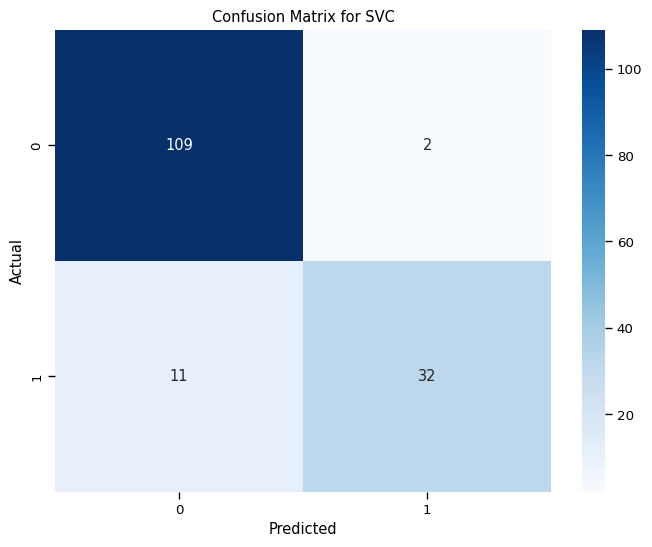


Tuning GradientBoostingClassifier...
Best parameters: {'learning_rate': 0.05680559213273095, 'max_depth': 3, 'n_estimators': 124}
Best score: 0.9983739837398374
Confusion matrix for GradientBoostingClassifier:
[[111   0]
 [  0  43]]


Classification report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        43

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154





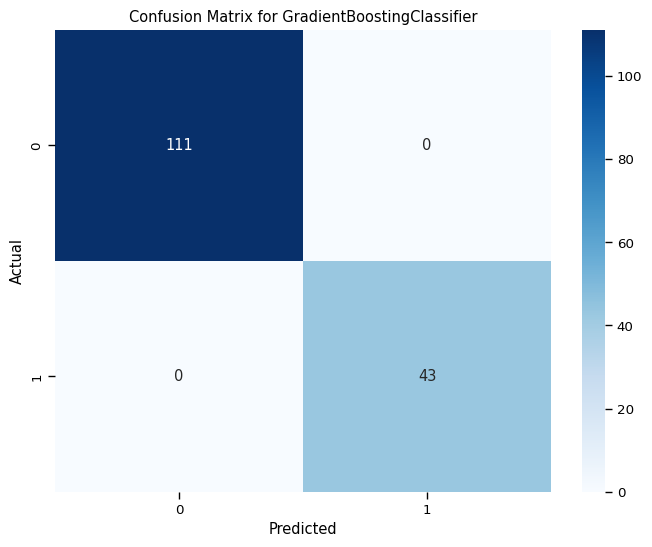


Tuning MLPClassifier...
Best parameters: {'alpha': 0.05996584841970366, 'hidden_layer_sizes': 31}
Best score: 0.982073837131814
Confusion matrix for MLPClassifier:
[[111   0]
 [  6  37]]


Classification report for MLPClassifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       111
           1       1.00      0.86      0.93        43

    accuracy                           0.96       154
   macro avg       0.97      0.93      0.95       154
weighted avg       0.96      0.96      0.96       154





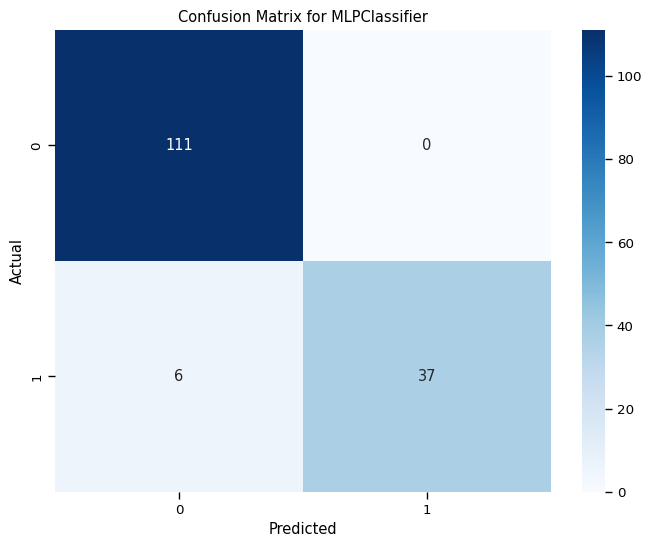


Tuning LGBMClassifier...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 203, number of negative: 411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 253
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330619 -> initscore=-0.705387
[LightGBM] [Info] Start training from score -0.705387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

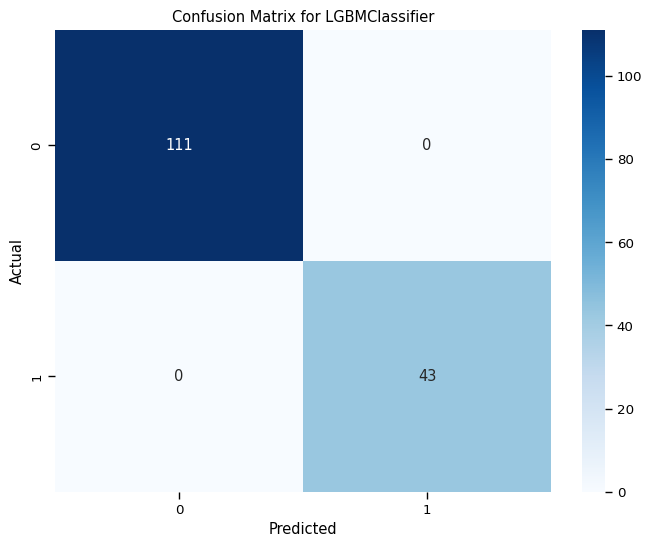

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Perform a randomized search for each model
for model in models:
    model_name = model.__class__.__name__
    print(f"\nTuning {model_name}...")

    # Initialize a RandomizedSearchCV object
    rs = RandomizedSearchCV(model, hyperparameters[model_name], n_iter=10, cv=5, random_state=42, n_jobs=-1)

    # Fit the RandomizedSearchCV object to the data
    rs.fit(X_train, y_train)

    # Print the best parameters and the best score
    print(f"Best parameters: {rs.best_params_}")
    print(f"Best score: {rs.best_score_}")

    # Make predictions on the test set
    y_pred = rs.best_estimator_.predict(X_test)

    # Print the confusion matrix
    print(f"Confusion matrix for {model_name}:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print("\n")

    # Print the classification report
    print(f"Classification report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("\n")

    # Generate heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

- True Negatives (top-left): The value 40 represents the number of instances that were correctly predicted as negative (0).
- False Positives (top-right): The value 3 represents the number of instances that were incorrectly predicted as positive (1) when they were actually negative (0).
- False Negatives (bottom-left): The value 0 represents the number of instances that were incorrectly predicted as negative (0) when they were actually positive (1).
- True Positives (bottom-right): The value 111 represents the number of instances that were correctly predicted as positive (1).

- Based on this confusion matrix, we can calculate various performance metrics for the logistic regression model, such as:

- Accuracy: The overall accuracy of the model, calculated as (True - Positives + True Negatives) / Total instances.
- Precision: The proportion of positive predictions that were actually correct, calculated as True Positives / (True Positives + False Positives).
- Recall (Sensitivity): The proportion of actual positive instances that were correctly identified, calculated as True Positives / (True Positives + False Negatives).
- Specificity: The proportion of actual negative instances that were correctly identified, calculated as True Negatives / (True Negatives + False Positives).

>The logistic regression model, random forest, gradient boosting, and light GBM classifiers performed exceptionally well, achieving perfect or near-perfect accuracy in predicting student churn.


-The confusion matrices for these models show high true positive and true negative rates, indicating accurate predictions for both churn and non-churn cases.


-The other models, such as K-nearest neighbors, support vector machines, and the MLP classifier, had slightly lower accuracy but still performed reasonably well.
-For example, the logistic regression model had a precision of 0.99 and a recall of 0.96 for predicting churn. This means that out of all the instances it predicted as churn, 99% were actually churn, and it correctly identified 96% of the actual churn instances.


-The random forest, gradient boosting, and light GBM classifiers achieved perfect precision and recall, indicating their ability to accurately identify both churn and non-churn cases.

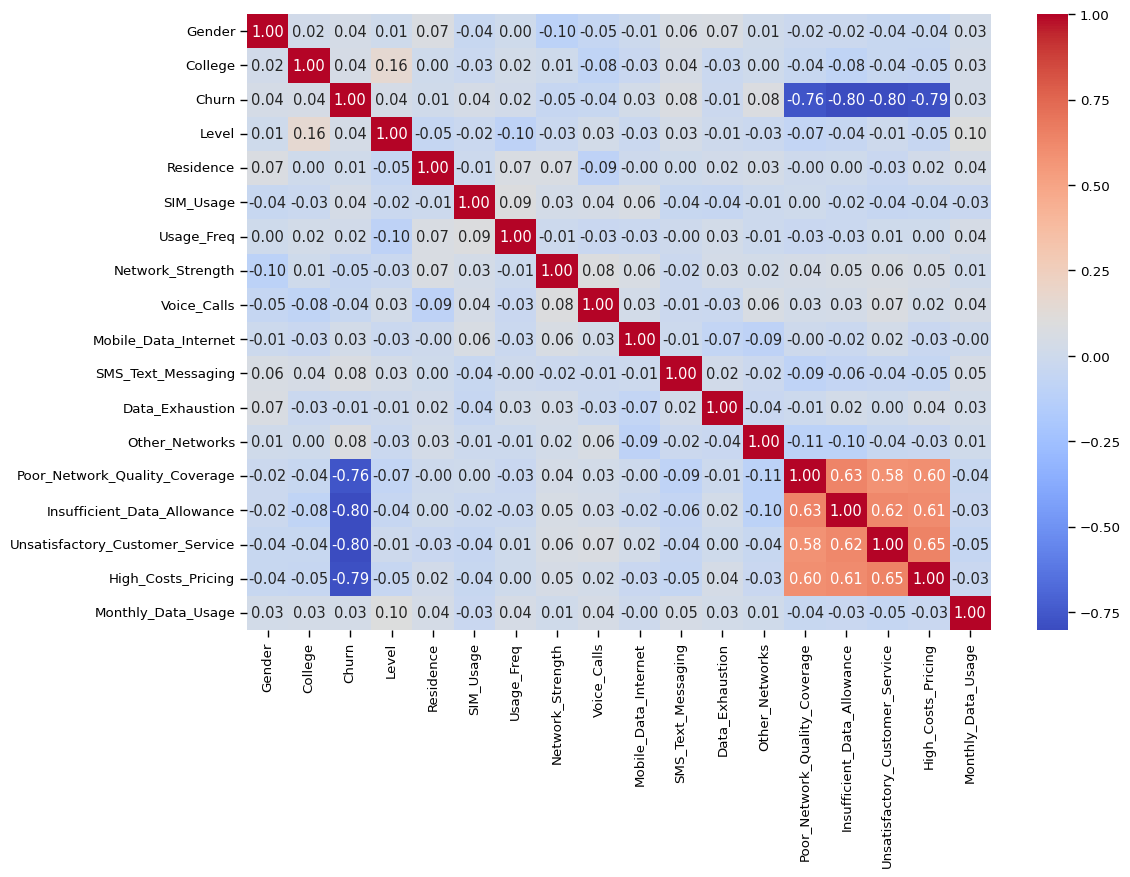

NameError: name 'numerical_features' is not defined

In [ ]:
# Load the dataset

# Perform feature analysis
# Distribution of numerical features

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Identify highly correlated features
highly_correlated_features = data.corr() > 0.7

# Distribution of categorical features
categorical_features = ['Gender', 'College', 'Churn', 'Residence', 'SIM_Usage', 'Usage_Freq', 'Voice_Calls', 'Mobile_Data_Internet', 'SMS_Text_Messaging', 'Data_Exhaustion', 'Other_Networks', 'Poor_Network_Quality_Coverage', 'Insufficient_Data_Allowance', 'Unsatisfactory_Customer_Service', 'High_Costs_Pricing']


# Identify outliers
for feature in numerical_features:
    sns.boxplot(data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec

# # Perform a randomized search for each model
# num_models = len(models)
# fig = plt.figure(figsize=(20, 5 * num_models))
# gs = GridSpec(num_models, 1)

# for i, model in enumerate(models):
#     model_name = model.__class__.__name__
#     print(f"\nTuning {model_name}...")

#     # Initialize a RandomizedSearchCV object
#     rs = RandomizedSearchCV(model, hyperparameters[model_name], n_iter=10, cv=5, random_state=42, n_jobs=-1)

#     # Fit the RandomizedSearchCV object to the data
#     rs.fit(X_train, y_train)

#     # Print the best parameters and the best score
#     print(f"Best parameters: {rs.best_params_}")
#     print(f"Best score: {rs.best_score_}")

#     # Make predictions on the test set
#     y_pred = rs.best_estimator_.predict(X_test)

#     # Print the confusion matrix
#     print(f"Confusion matrix for {model_name}:")
#     conf_matrix = confusion_matrix(y_test, y_pred)
#     print(conf_matrix)
#     print("\n")

#     # Print the classification report
#     print(f"Classification report for {model_name}:")
#     print(classification_report(y_test, y_pred))
#     print("\n")

#     # Generate heatmap for confusion matrix
#     ax = fig.add_subplot(gs[i, 0])
#     sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax)
#     ax.set_title(f'Confusion Matrix for {model_name}')
#     ax.set_xlabel('Predicted')
#     ax.set_ylabel('Actual')

# plt.tight_layout()
# plt.show()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Distribution of numerical features
# data.hist(figsize=(10, 10))
# plt.show()

# # Correlation heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
# plt.show()


In [ ]:
# plt.figure(figsize=(20, 10))

# sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')


***